<a href="https://colab.research.google.com/github/anveshveeramalla/Anvesh_INFO5731_SPRING2022/blob/main/INFO5731_Assignment_Three_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [2]:
# Write your code here
import pandas as pd
data = pd.read_csv("/content/sample_data/twitter_data")
data.head()





,Date,Tweet,User,Location
0,2022-04-11 01:09:02,"The silence from @JGreenblattADL, @ADL, @GovMu...",ArieBaNegev,NaN
1,2022-04-11 01:08:07,I hope you are enjoying your day 😊 \n#SelfCare...,LupusGangsta,"Phoenix, AZ"
2,2022-04-11 01:08:00,April is #NationalArabAmericanHeritageMonth. I...,manthonyhunter,"Los Angeles, CA"
3,2022-04-11 01:07:53,—\n\nMarc Andreesen (he/him)\nClick here to do...,ctlcsm,NaN
4,2022-04-11 01:02:33,#BlackLivesMatter buys church and removes whit...,LogicalNotes,NaN


In [3]:
import re

def cleantext(tweets):
    text = re.sub(r'@[A-Za-z0-9_]+', '', tweets) #removes @mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) #removing Hashtag symbols.
    text = re.sub(r'RT[\s]+', '', text) #removing Retweet symbol (RT).
    text = re.sub(r'https?:\/\/\S+', '', text) #remove URL's.
    text = re.sub(r"www.\S+", "", text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^A-Za-z0-9]"," ", text)#Filtering non-alphanumeric characters
    text = re.sub('\\n', '', text)#removing the '\n' character
    text = re.sub(r'[0-9]+', '', text)#removing numbers
    
    return text

data["Tweet"] = data["Tweet"].apply(cleantext)

#Converting the text into lower case
data['Tweet']=data["Tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

#removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
data['Tweet']=data['Tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))


#Lemmatization
from textblob import Word
nltk.download('wordnet')
data['Tweet']=data['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
data.to_csv("/content/sample_data/twitter_data", index = False)

In [5]:
data.head()

,Date,Tweet,User,Location
0,2022-04-11 01:09:02,silence demokkkratic party deafening cuz onl,ArieBaNegev,NaN
1,2022-04-11 01:08:07,hope enjoying day,LupusGangsta,"Phoenix, AZ"
2,2022-04-11 01:08:00,april time celebrating history contribution cu...,manthonyhunter,"Los Angeles, CA"
3,2022-04-11 01:07:53,marc andreesen click donate,ctlcsm,NaN
4,2022-04-11 01:02:33,buy church remove white doctrine set black free,LogicalNotes,NaN


In [6]:
import nltk
from nltk.util import ngrams

#Create all frequncies of unigrams, bigrams, trigrams for future use in the assignment
clean_data = open('/content/sample_data/twitter_data', "r")
unigrams = ngrams(clean_data.read().split(), 1)
unigra_freq_dist=nltk.FreqDist(unigrams)
unigra_freq_dist

FreqDist({('Date,Tweet,User,Location',): 1,
          ('2022-04-11',): 46,
          ('01:09:02,silence',): 1,
          ('demokkkratic',): 1,
          ('party',): 16,
          ('deafening',): 1,
          ('cuz',): 4,
          ('onl,ArieBaNegev,',): 1,
          ('01:08:07,hope',): 1,
          ('enjoying',): 3,
          ('day,LupusGangsta,"Phoenix,',): 1,
          ('AZ"',): 10,
          ('01:08:00,april',): 1,
          ('time',): 87,
          ('celebrating',): 5,
          ('history',): 86,
          ('contribution',): 3,
          ('culture,manthonyhunter,"Los',): 1,
          ('Angeles,',): 71,
          ('CA"',): 174,
          ('01:07:53,marc',): 1,
          ('andreesen',): 1,
          ('click',): 13,
          ('donate,ctlcsm,',): 1,
          ('01:02:33,buy',): 1,
          ('church',): 15,
          ('remove',): 4,
          ('white',): 233,
          ('doctrine',): 1,
          ('set',): 14,
          ('black',): 703,
          ('free,LogicalNotes,',): 1,
          

In [7]:
#creating bigram for future use in the assignment
clean_data = open('/content/sample_data/twitter_data', "r")
bigrams = ngrams(clean_data.read().split(), 2)
bigra_freq_dist=nltk.FreqDist(bigrams)
bigra_freq_dist

FreqDist({('Date,Tweet,User,Location', '2022-04-11'): 1,
          ('2022-04-11', '01:09:02,silence'): 1,
          ('01:09:02,silence', 'demokkkratic'): 1,
          ('demokkkratic', 'party'): 1,
          ('party', 'deafening'): 1,
          ('deafening', 'cuz'): 1,
          ('cuz', 'onl,ArieBaNegev,'): 1,
          ('onl,ArieBaNegev,', '2022-04-11'): 1,
          ('2022-04-11', '01:08:07,hope'): 1,
          ('01:08:07,hope', 'enjoying'): 1,
          ('enjoying', 'day,LupusGangsta,"Phoenix,'): 1,
          ('day,LupusGangsta,"Phoenix,', 'AZ"'): 1,
          ('AZ"', '2022-04-11'): 1,
          ('2022-04-11', '01:08:00,april'): 1,
          ('01:08:00,april', 'time'): 1,
          ('time', 'celebrating'): 1,
          ('celebrating', 'history'): 1,
          ('history', 'contribution'): 1,
          ('contribution', 'culture,manthonyhunter,"Los'): 1,
          ('culture,manthonyhunter,"Los', 'Angeles,'): 1,
          ('Angeles,', 'CA"'): 67,
          ('CA"', '2022-04-11'): 2,
     

In [8]:
#similarly for trigrams: using same methodology
#created trigram frequncies for the whole dataset
clean_data = open('/content/sample_data/twitter_data', "r")
trigrams = ngrams(clean_data.read().split(), 3)
trigra_freq_dist=nltk.FreqDist(trigrams)
trigra_freq_dist

FreqDist({('Date,Tweet,User,Location', '2022-04-11', '01:09:02,silence'): 1,
          ('2022-04-11', '01:09:02,silence', 'demokkkratic'): 1,
          ('01:09:02,silence', 'demokkkratic', 'party'): 1,
          ('demokkkratic', 'party', 'deafening'): 1,
          ('party', 'deafening', 'cuz'): 1,
          ('deafening', 'cuz', 'onl,ArieBaNegev,'): 1,
          ('cuz', 'onl,ArieBaNegev,', '2022-04-11'): 1,
          ('onl,ArieBaNegev,', '2022-04-11', '01:08:07,hope'): 1,
          ('2022-04-11', '01:08:07,hope', 'enjoying'): 1,
          ('01:08:07,hope', 'enjoying', 'day,LupusGangsta,"Phoenix,'): 1,
          ('enjoying', 'day,LupusGangsta,"Phoenix,', 'AZ"'): 1,
          ('day,LupusGangsta,"Phoenix,', 'AZ"', '2022-04-11'): 1,
          ('AZ"', '2022-04-11', '01:08:00,april'): 1,
          ('2022-04-11', '01:08:00,april', 'time'): 1,
          ('01:08:00,april', 'time', 'celebrating'): 1,
          ('time', 'celebrating', 'history'): 1,
          ('celebrating', 'history', 'contributi

In [9]:
# Write your code here

def probability_bigram():
    for bigram_values in bigra_freq_dist:
        #print(bigram_values)
        print(("bigram values", bigram_values,"Probability :",bigra_freq_dist[bigram_values]/unigra_freq_dist[(bigram_values[0],)]))

probability_bigram()





Streaming output truncated to the last 5000 lines.
('bigram values', ('xx,shiv_smith,"London,', 'England"'), 'Probability :', 1.0)
('bigram values', ('2022-04-05', '17:06:40,backintheday'), 'Probability :', 0.000949667616334283)
('bigram values', ('17:06:40,backintheday', 'seemed'), 'Probability :', 1.0)
('bigram values', ('seemed', 'like'), 'Probability :', 1.0)
('bigram values', ('like', 'everyone'), 'Probability :', 0.00546448087431694)
('bigram values', ('everyone', 'agreed'), 'Probability :', 0.034482758620689655)
('bigram values', ('agreed', 'cop'), 'Probability :', 1.0)
('bigram values', ('cop', 'nuisance'), 'Probability :', 0.0196078431372549)
('bigram values', ('nuisance', 'flying'), 'Probability :', 1.0)
('bigram values', ('flying', 'flag'), 'Probability :', 0.5)
('bigram values', ('flag', 'support'), 'Probability :', 0.07692307692307693)
('bigram values', ('support', 'cop'), 'Probability :', 0.010526315789473684)
('bigram values', ('cop', 'cuz,embernovaquinn,"nearBtown,VT'),

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
# Write your code here

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
clean_data = open("/content/sample_data/twitter_data", "r")

_noun = lambda pos: pos[:2] == 'NN'
tokenized = nltk.word_tokenize(clean_data.read())
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if _noun(pos)] 





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
nouns 

['Date',
 'Tweet',
 'User',
 'Location',
 'silence',
 'party',
 'onl',
 'ArieBaNegev',
 'day',
 'LupusGangsta',
 'Phoenix',
 'AZ',
 'time',
 'history',
 'contribution',
 'culture',
 'manthonyhunter',
 'Los',
 'Angeles',
 'CA',
 'click',
 'donate',
 'ctlcsm',
 'church',
 'doctrine',
 'LogicalNotes',
 'name',
 'lewis',
 'TheLivesThatMtr',
 'ding',
 'OldMainBell',
 'University',
 'Park',
 'PA',
 'check',
 'tap',
 'sign',
 'get',
 'myjunkntrunk',
 'Brookfield',
 'Ohio',
 'homeland',
 'tlingit',
 'haida',
 'tsimshian',
 'RickSydney',
 'Sydney',
 'Australia',
 '🇺🇸🇦🇺',
 'jst',
 'Shane2002D',
 'Hammanskraal',
 'South',
 'Africa',
 'face',
 'despair',
 'botto',
 'Gremol_la_Munka',
 'im',
 'oooh',
 'slap',
 'redz041',
 'homeland',
 'tlingit',
 'haida',
 'tsimshian',
 'RickSydney',
 'Sydney',
 'Australia',
 '🇺🇸🇦🇺',
 'chris',
 'lawrencethis',
 'drsharisse',
 'please',
 'jam',
 'health',
 'fair',
 'drsharisse',
 'Dallas',
 'TX',
 'susanne',
 'brunner',
 'please',
 'jam',
 'health',
 'fair',
 'drsha

In [13]:
import nltk
nltk.download('brown')
clean_data = open('/content/sample_data/twitter_data', "r")
#print(clean_data)
blob = TextBlob(clean_data.read())
noun_phrases = blob.noun_phrases
print(noun_phrases)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
['date', 'tweet', 'user', 'location', '2022-04-11 01:09:02', 'silence demokkkratic party', 'cuz onl', 'ariebanegev', '2022-04-11 01:08:07', 'lupusgangsta', 'phoenix', 'az', '2022-04-11 01:08:00', 'april time', 'history contribution culture', 'los angeles', 'ca', '2022-04-11 01:07:53', 'marc andreesen click donate', '2022-04-11 01:02:33', 'white doctrine', 'logicalnotes', '2022-04-11 01:02:04', 'name glenn lewis', 'thelivesthatmtr', '2022-04-11 01:00:01', 'oldmainbell', 'university park', 'pa', '2022-04-11 00:55:39', 'mercari tap link', 'brookfield', 'ohio', '2022-04-11 00:55:26', 'traditional homeland tlingit haida tsimshian', 'ricksydney', 'sydney', 'australia', '2022-04-11 00:54:14', 'pretty sure look jst', 'shane2002d', 'hammanskraal', 'africa', '2022-04-11 00:53:00', 'despair look u botto', 'gremol_la_munka', '2022-04-11 00:46:37', 'happy oooh slap', '2022-04-11 00:46:09', '2022-0

In [14]:
df_noun = pd.DataFrame(noun_phrases, columns = ['noun_phrases'])
df_noun # adding the noun phrases to the data frame

,noun_phrases
0,date
1,tweet
2,user
3,location
4,2022-04-11 01:09:02
...,...
25544,jun florissant missouri police
25545,protester lawn
25546,2022-04-03 00:26:12
25547,black victim


In [15]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

clean_data = open('/content/sample_data/twitter_data', "r")
f = nltk.FreqDist(noun_phrases)
f # gives the frequncy of noun phrases

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


FreqDist({'date': 1,
          'tweet': 1,
          'user': 1,
          'location': 2,
          '2022-04-11 01:09:02': 1,
          'silence demokkkratic party': 1,
          'cuz onl': 1,
          'ariebanegev': 13,
          '2022-04-11 01:08:07': 1,
          'lupusgangsta': 3,
          'phoenix': 7,
          'az': 10,
          '2022-04-11 01:08:00': 1,
          'april time': 1,
          'history contribution culture': 1,
          'los angeles': 97,
          'ca': 203,
          '2022-04-11 01:07:53': 1,
          'marc andreesen click donate': 1,
          '2022-04-11 01:02:33': 1,
          'white doctrine': 1,
          'logicalnotes': 2,
          '2022-04-11 01:02:04': 1,
          'name glenn lewis': 1,
          'thelivesthatmtr': 33,
          '2022-04-11 01:00:01': 1,
          'oldmainbell': 193,
          'university park': 193,
          'pa': 208,
          '2022-04-11 00:55:39': 1,
          'mercari tap link': 1,
          'brookfield': 1,
          'ohio':

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [17]:
tf_result = (data['Tweet']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf_result.columns = ['tweet_words','tf']
tf_result

,tweet_words,tf
0,silence,12.0
1,demokkkratic,1.0
2,party,25.0
3,deafening,1.0
4,cuz,8.0
...,...,...
8537,tattoo,1.0
8538,latasha,2.0
8539,harlans,1.0
8540,importan,1.0


In [19]:
import numpy as np
#calculating tf*idf
for i,j in enumerate(tf_result['tweet_words']):
    tf_result.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Tweet'].str.contains(j)])))
tf_result['tf*idf'] = tf_result['tf'] * tf_result['idf']
tf_result

,tweet_words,tf,idf,tf*idf
0,silence,12.0,6.207440,74.489275
1,demokkkratic,1.0,8.846497,8.846497
2,party,25.0,5.627621,140.690528
3,deafening,1.0,8.846497,8.846497
4,cuz,8.0,6.649272,53.194179
...,...,...,...,...
8537,tattoo,1.0,8.846497,8.846497
8538,latasha,2.0,8.153350,16.306700
8539,harlans,1.0,8.846497,8.846497
8540,importan,1.0,5.157617,5.157617


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA

In [22]:
tn_set = data['Tweet'].values.tolist() #train set
tt_set = "black life matter everyone going get result sort look like result design sad"   #Query taken from one of the tweets which is called test set
tt_set = [tt_set]
stopWords = stopwords.words('english')
vzer = CountVectorizer(stop_words = stopWords)
#print(vectorizer)
transformer = TfidfTransformer()
#print(transformer)

In [23]:
tnVectorizerArray = vzer.fit_transform(tn_set).toarray()
ttVectorizerArray = vzer.transform(tt_set).toarray()
cx = lambda a, b : np.inner(a, b)/(LA.norm(a)*LA.norm(b))
cosine_values = []

In [24]:
for vector in tnVectorizerArray:
        for testV in ttVectorizerArray:
            cosine = cx(vector, testV)
            cosine_values.append(cosine)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
df_result = data.filter(['Tweet'], axis=1)
se = pd.Series(cosine_values)
df_result['Cosine_similarity'] = se.values
df_result

,Tweet,Cosine_similarity
0,silence demokkkratic party deafening cuz onl,0.000000
1,hope enjoying day,0.000000
2,april time celebrating history contribution cu...,0.000000
3,marc andreesen click donate,0.000000
4,buy church remove white doctrine set black free,0.091287
...,...,...
6945,seen love song latasha netflix yet u,0.000000
6946,many watched minute short documentary latasha ...,0.000000
6947,black people really need let go respectability...,0.074536
6948,sat jun florissant missouri police push protes...,0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [26]:
import pandas as pd
import gensim
from gensim import models
from gensim.models import Word2Vec

df = pd.read_csv("/content/sample_data/twitter_data")

In [28]:
list2 = []
for i in df.index:
    y = str(df["Tweet"][i]).split()
    list2.append(y)

In [29]:
model2 = Word2Vec(list2, size = 300)
print(model2)

Word2Vec(vocab=1789, size=300, alpha=0.025)


In [30]:
words2 = list(model2.wv.vocab)

In [31]:
words2

['silence',
 'party',
 'cuz',
 'hope',
 'day',
 'april',
 'time',
 'celebrating',
 'history',
 'culture',
 'click',
 'donate',
 'buy',
 'church',
 'white',
 'set',
 'black',
 'free',
 'say',
 'name',
 'ding',
 'amp',
 'check',
 'link',
 'sign',
 'get',
 'welcome',
 'pretty',
 'sure',
 'look',
 'like',
 'long',
 'put',
 'colour',
 'face',
 'u',
 'im',
 'happy',
 'slap',
 'nan',
 'chris',
 'drsharisse',
 'please',
 'come',
 'texas',
 'jam',
 'health',
 'fair',
 'pb',
 'news',
 'weekend',
 'full',
 'episode',
 'davis',
 'need',
 'gay',
 'see',
 'people',
 'child',
 'eth',
 'mind',
 'evil',
 'hear',
 'speak',
 'every',
 'solidarity',
 'always',
 'person',
 'woman',
 'ally',
 'fri',
 'jul',
 'chicago',
 'illinois',
 'violent',
 'arrest',
 'made',
 'grant',
 'park',
 'watch',
 'double',
 'find',
 'breonna',
 'taylor',
 'deserves',
 'petition',
 'honor',
 'family',
 'still',
 'help',
 'thanks',
 'much',
 'support',
 'guy',
 'best',
 'michael',
 'brown',
 'jr',
 'different',
 'skin',
 'hair',


In [32]:
print(model2['racism'])

[-9.16055739e-02 -1.26806229e-01 -2.26263076e-01 -2.50214543e-02
 -1.78608164e-01  1.03010029e-01 -2.45494634e-01  6.28856272e-02
  1.18055632e-02 -6.67405054e-02 -2.54264534e-01  3.60321581e-01
 -1.01349816e-01 -2.06378579e-01  2.27795318e-01  2.69055087e-02
  2.85604894e-01 -2.39415541e-01 -3.23801003e-02  5.75490855e-02
 -3.51918563e-02 -4.00673933e-02 -9.15201530e-02 -1.78551823e-01
  9.71174911e-02 -9.52878967e-02  4.03438397e-02  1.24118328e-02
  1.29646212e-01  9.15164221e-03 -1.63942594e-02 -8.64871740e-02
 -1.76833466e-01 -4.28360626e-02  2.63731908e-02  7.28498846e-02
  3.22469212e-02  9.55810100e-02  1.40665263e-01 -3.38229746e-01
 -3.45552236e-01 -4.74151969e-02 -4.49496865e-01 -2.97430083e-02
 -2.99838632e-01 -8.22900310e-02  2.03955978e-01  2.02404127e-01
 -2.57599473e-01 -7.76845664e-02 -1.56896979e-01 -2.64619105e-02
  1.19182691e-01 -2.40524217e-01 -4.42754924e-02 -1.46600023e-01
  6.36330321e-02  1.02195084e-01 -1.31965384e-01 -4.35483418e-02
 -1.33333296e-01  1.40163

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [33]:
from sklearn.decomposition import PCA

X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


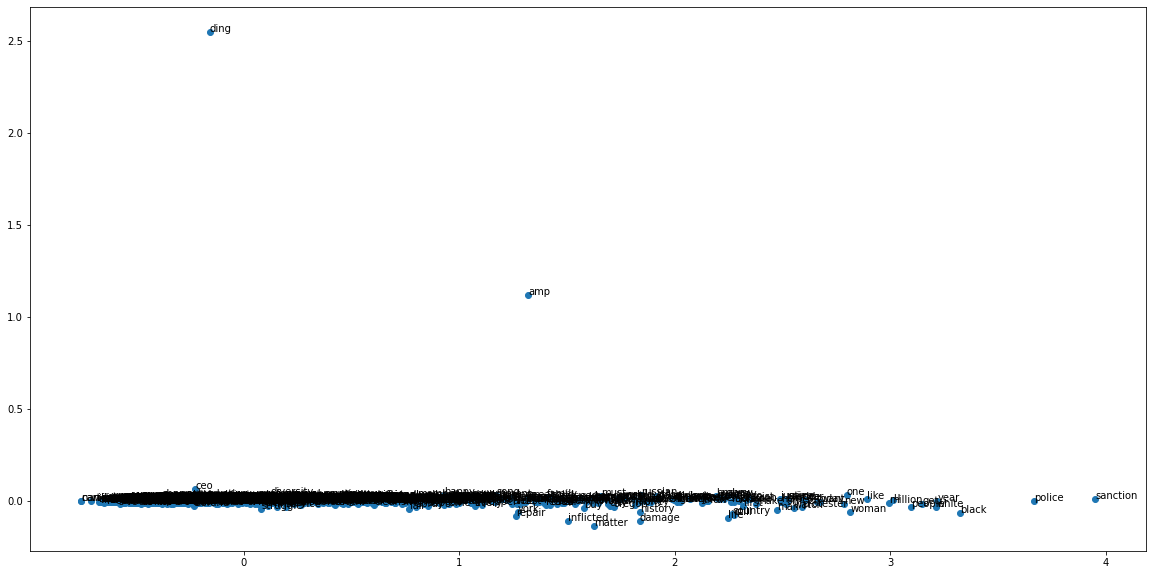

In [34]:
import matplotlib.pyplot as plt
plt.figure (figsize = (20,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: https://github.com/anveshveeramalla/Anvesh_INFO5731_SPRING2022/blob/main/Assignment3_dataset.csv



